<a href="https://colab.research.google.com/github/TouqeerShahid951/biovitality-FYP/blob/master/disease_detection_(5)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
#from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop

In [ ]:
EPOCHS = 12
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = 'dataset/'
width=256
height=256
depth=3


In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)
            image = cv2.resize(image, (50,50))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None


In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")

            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:2000]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Grape Black Measles ...
[INFO] Processing Grape Black_rot ...
[INFO] Processing Grape Healthy ...
[INFO] Processing Grape Leaf Spot ...
[INFO] Image loading completed


In [ ]:
image_size = len(image_list)

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float16) / 255.0

print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)
print(image_labels)


['Grape Black Measles' 'Grape Black_rot' 'Grape Healthy' 'Grape Leaf Spot']
[INFO] Spliting data to train, test
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


2600 train samples
651 test samples
Label: [[1 0 0 0]]


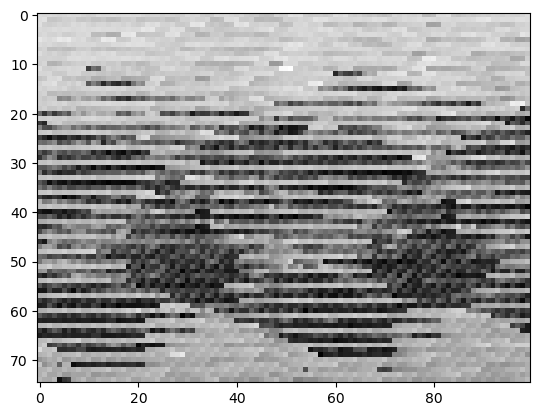

In [ ]:
#x_train = x_train.reshape(4915200, 64)
#x_test = x_test.reshape(4915200, 64)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#x_train /= 255
#x_test /= 255

#y_train = keras.utils.to_categorical(y_train, n_classes)
#y_test = keras.utils.to_categorical(y_test, n_classes)

print("Label:",y_train[255:256])
plt.imshow(x_train[255:256].reshape(75,100), cmap='gray')
plt.show()

In [ ]:
first_layer_size = 32
model = Sequential()
inputShape = (50, 50, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
# model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(1024))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(n_classes))
# model.add(Activation("softmax"))

model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 5184)              0         
                                                                 
 dense (Dense)               (None, 1000)              5

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=RMSprop(),metrics=["accuracy"])
# train the network
print("[INFO] training network...")



#history = model.fit_generator(
#    aug.flow(x_train, y_train, batch_size=BS),
#    validation_data=(x_test, y_test),
#    steps_per_epoch=len(x_train) // BS,
#    epochs=EPOCHS, verbose=1
#    )
history = model.fit(x_train,y_train,validation_split=0.25,
                    batch_size=BS,
                    epochs=EPOCHS,validation_data=(x_test, y_test),
                    verbose=1)

C:\Users\Asus\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[INFO] training network...
Epoch 1/12
82/82 [==============================] - 11s 116ms/step - loss: 1.3302 - accuracy: 0.4727 - val_loss: 1.6101 - val_accuracy: 0.4424
Epoch 2/12
82/82 [==============================] - 9s 110ms/step - loss: 0.7265 - accuracy: 0.6877 - val_loss: 0.5005 - val_accuracy: 0.7819
Epoch 3/12
82/82 [==============================] - 10s 117ms/step - loss: 0.4936 - accuracy: 0.8073 - val_loss: 0.3155 - val_accuracy: 0.8725
Epoch 4/12
82/82 [==============================] - 9s 110ms/step - loss: 0.4044 - accuracy: 0.8542 - val_loss: 0.6459 - val_accuracy: 0.7527
Epoch 5/12
82/82 [==============================] - 9s 108ms/step - loss: 0.3040 - accuracy: 0.8854 - val_loss: 0.7058 - val_accuracy: 0.7650
Epoch 6/12
82/82 [==============================] - 9s 109ms/step - loss: 0.2701 - accuracy: 0.9038 - val_loss: 0.3184 - val_accuracy: 0.8817
Epoch 7/12
82/82 [==============================] - 9s 109ms/step - loss: 0.2136 - accuracy: 0.9215 - val_loss: 0.4471 

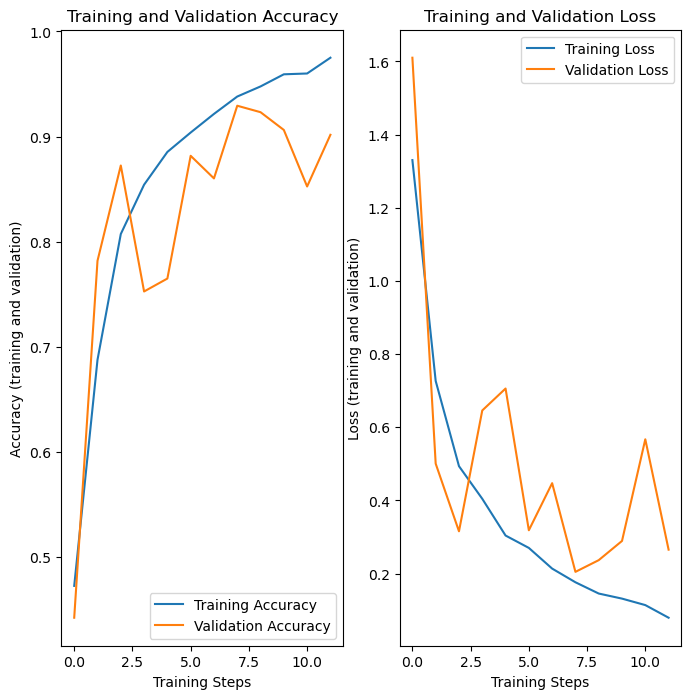

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('graph_accuracy_graph.png',dpi=400)
plt.show()




In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
21/21 [==============================] - 0s 22ms/step - loss: 0.2654 - accuracy: 0.9017
Test Accuracy: 90.16897082328796


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26535990834236145
Test accuracy: 0.9016897082328796


In [ ]:
prediction = model.predict(x_test[23:24])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 138ms/step
Prediction
 [9.9996078e-01 3.9239621e-05 1.2636844e-13 4.5246020e-12]

Thresholded output
 [1 0 0 0]


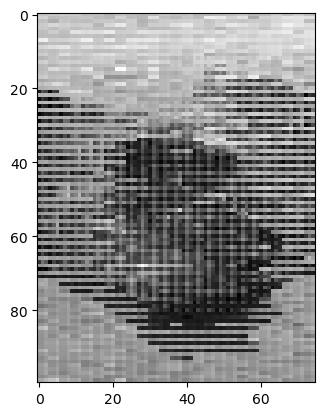

In [ ]:
plt.imshow(x_test[23:24].reshape(100,75),cmap='gray')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "blue")
    fig.tight_layout()
    return ax

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
prediction = model.predict(x_test, batch_size=10, verbose=0)
rounded_prediction = model.predict(x_test, batch_size=10, verbose=0)
#y_pred=np.argmax(y_pred, axis=1)

In [ ]:
for i in rounded_prediction:
    print(i)

[1.23e-13 4.39e-11 1.57e-13 1.00e+00]
[8.99e-01 1.01e-01 3.96e-09 1.17e-08]
[2.62e-05 9.99e-01 2.44e-07 5.33e-04]
[1.00e+00 8.04e-05 3.38e-12 8.23e-12]
[7.57e-08 4.28e-06 1.59e-13 1.00e+00]
[9.99e-01 8.79e-04 4.15e-14 1.32e-09]
[2.95e-04 8.34e-03 4.74e-03 9.87e-01]
[7.23e-06 1.12e-02 7.28e-04 9.88e-01]
[8.08e-02 9.19e-01 1.11e-05 1.42e-04]
[8.98e-01 1.02e-01 7.70e-11 4.60e-11]
[9.79e-01 2.13e-02 8.71e-09 9.32e-07]
[4.94e-12 1.26e-10 1.11e-13 1.00e+00]
[8.65e-03 2.81e-05 1.83e-11 9.91e-01]
[6.28e-02 9.37e-01 9.78e-08 1.53e-06]
[1.00e+00 9.45e-05 8.42e-13 8.36e-11]
[2.72e-07 2.29e-05 1.00e+00 3.34e-07]
[1.08e-10 1.47e-08 3.21e-12 1.00e+00]
[1.56e-04 3.74e-01 2.02e-05 6.25e-01]
[1.00e+00 1.95e-04 6.85e-14 1.95e-06]
[9.95e-01 5.44e-03 5.56e-15 2.74e-10]
[3.45e-02 9.65e-01 2.49e-06 4.47e-04]
[6.36e-03 9.94e-01 3.28e-08 2.83e-05]
[1.00e+00 2.06e-05 2.04e-12 1.50e-09]
[1.00e+00 3.92e-05 1.26e-13 4.52e-12]
[5.36e-02 9.46e-01 9.27e-06 1.17e-04]
[1.00e+00 2.08e-05 3.25e-15 1.67e-06]
[9.99e-01 1.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(x_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

#                        (or)

# y_pred = model.predict(x_test)
# print(y_pred)

# p=model.predict(x_test) # to predict probability
# p=np.argmax(predict,axis=1)
# target_names = ['class 0(BIKES)', 'class 1(CARS)', 'class 2(HORSES)']
print(label_binarizer.classes_)
target_names = label_binarizer.classes_
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


21/21 [==============================] - 0s 17ms/step
[[1.23e-13 4.39e-11 1.57e-13 1.00e+00]
 [8.99e-01 1.01e-01 3.96e-09 1.17e-08]
 [2.62e-05 9.99e-01 2.44e-07 5.33e-04]
 ...
 [1.49e-09 7.37e-08 3.86e-10 1.00e+00]
 [3.40e-06 8.05e-06 4.02e-08 1.00e+00]
 [1.00e+00 2.43e-05 5.50e-13 8.11e-08]]
[3 0 1 0 3 0 3 3 1 0 0 3 3 1 0 2 3 3 0 0 1 1 0 0 1 0 0 3 0 0 3 3 3 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 3 2 3 3 2 0 1 0 0 0 2 0 3 0 3 3 0 0 0 3 3 3 1 2 1 0 3
 3 0 1 3 0 2 1 0 0 1 1 1 0 3 0 0 1 1 3 0 1 0 2 0 0 1 1 1 0 1 0 3 0 0 2 1 3
 2 0 3 1 0 1 3 0 0 3 3 0 0 3 3 1 0 0 0 1 1 1 0 0 1 1 3 1 3 1 0 0 3 3 3 1 0
 0 0 0 2 1 1 0 2 0 0 0 3 3 3 1 1 3 2 1 0 0 3 1 0 3 1 1 0 3 0 0 0 1 1 1 0 3
 0 0 3 0 3 1 1 1 2 3 0 1 0 3 0 1 0 0 3 3 3 1 3 1 2 0 2 2 3 1 1 0 0 2 1 0 1
 0 3 0 3 3 1 3 0 0 3 1 0 0 1 0 0 3 2 2 0 3 3 1 3 3 3 0 0 0 1 0 0 1 3 3 0 0
 0 1 3 0 1 1 3 0 2 1 2 1 1 2 0 3 1 0 1 1 1 1 3 1 0 0 0 3 1 3 3 2 0 3 1 0 0
 0 3 0 0 1 0 3 1 0 0 0 2 3 0 0 0 3 3 1 3 2 0 0 1 3 0 0 0 3 1 1 3 0 0 0 0 0
 0 3 0 1 1 0 0 2 1 2 0 0 2 0 0 

Normalized confusion matrix
[[0.94 0.06 0.   0.  ]
 [0.17 0.8  0.01 0.02]
 [0.   0.16 0.83 0.02]
 [0.01 0.02 0.01 0.97]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

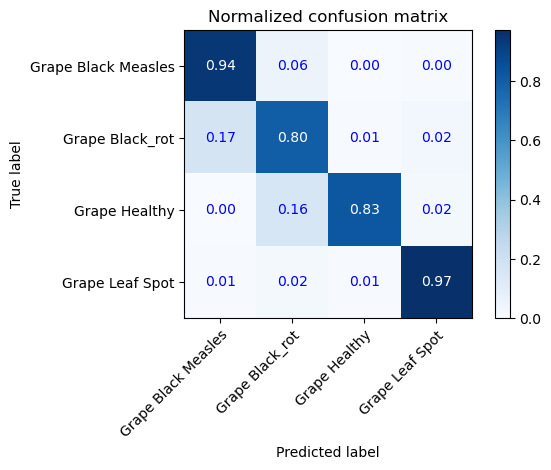

In [ ]:
plot_confusion_matrix(np.argmax(y_test,axis=1), y_pred, classes=label_binarizer.classes_, normalize=True,
                      title='Normalized confusion matrix')

Confusion matrix, without normalization
[[238  14   0   1]
 [ 28 130   1   4]
 [  0  10  52   1]
 [  1   3   1 167]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

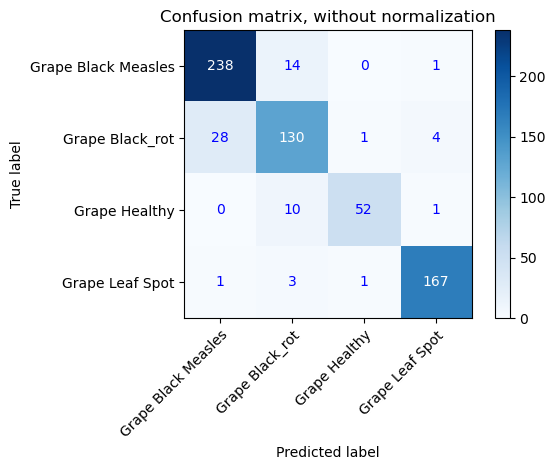

In [ ]:
plot_confusion_matrix(np.argmax(y_test,axis=1), y_pred, classes=label_binarizer.classes_,
                      title='Confusion matrix, without normalization')


In [ ]:
model.save('grape.h5')

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('grape.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model_grape.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpc21jl76w\assets


INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpc21jl76w\assets
